### Cargando la data **CSV** del entorno de ejecución local

In [ ]:
import chardet
import pandas as pd

with open('SIRNPD_2021_agosto.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
data = pd.read_csv('SIRNPD_2021_agosto.csv', encoding = enc['encoding'])
data.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (38,39,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(332193, 66)

In [ ]:
data.head()

,[Canal tramite],[PaisNacimiento],[NacDepartamento],[NacProvincia],[NacDistrito],[Fecha inscripcion],[Año inscripcion],[Resolución de inscripcion],[Mes inscripcion],[CCDD_ins],...,[dley_mental],[dley_intelectual],[Dg_SDOWN],[Dg_TEA],[Dg_Esquizofrenia],[Dg_RetrazoM],[Dg_ParalisisC],[Dg_Talla_baja],[Estado Registro],[Edad inscripcion]
0,1,PERÚ,PIURA,HUANCABAMBA,HUANCABAMBA,2000-08-10,2000,2,8,7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,36
1,1,PERÚ,LIMA,LIMA,RÍMAC,2000-03-06,2000,9,3,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,63
2,1,PERÚ,CUSCO,CANCHIS,SICUANI,2000-12-18,2000,11,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,45
3,1,PERÚ,LIMA,LIMA,LA VICTORIA,2000-03-16,2000,50,3,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18
4,1,PERÚ,LIMA,LIMA,MIRAFLORES,2001-01-01,2001,1,1,15,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,60


### Cargando la data de **Google Drive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import chardet
import pandas as pd

url = "/content/drive/My Drive/Colab Notebooks/PCD/data/"
name = "SIRNPD_2021_agosto.csv"
path = url + name

with open(path, 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large

data = pd.read_csv(path, encoding = enc['encoding'])
data.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (38,39,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(332193, 66)

In [3]:
data.columns

Index(['[Canal tramite]', '[PaisNacimiento]', '[NacDepartamento]',
       '[NacProvincia]', '[NacDistrito]', '[Fecha inscripcion]',
       '[Año inscripcion]', '[Resolución de inscripcion]', '[Mes inscripcion]',
       '[CCDD_ins]', '[CCPP_ins]', '[CCDI_ins]', '[DomDepartamentoIns]',
       '[DomProvinciaIns]', '[DomDistritoIns]', '[GrupoEdad inscripcion]',
       '[LimGravedad inscripcion]', '[GrupoEdad actual]', '[Edad]', '[Genero]',
       '[EstadoCivil]', '[EducaNivelResum actualizacion]', '[CCDD]', '[CCPP]',
       '[CCDI]', '[LimConducta]', '[LimComunicacion]', '[LimCuidado]',
       '[LimLocomocion]', '[LimCorporal]', '[LimDestreza]', '[LimSituacion]',
       '[LimNumero]', '[LimGravedad]', '[DIAG_D_1]', '[DIAG_D_2]',
       '[DIAG_D_3]', '[DIAG_D_4]', '[DIAG_D_5]', '[DIAG_D_6]', '[DIAG_E_1]',
       '[DIAG_E_2]', '[DIAG_E_3]', '[DIAG_E_4]', '[DIAG_E_5]', '[DIAG_E_6]',
       '[def_intelectual]', '[def_psicologica]', '[def_lenguaje]',
       '[def_audicion]', '[def_vision]', '[d

### Procesando y Depurando la data

In [4]:
dataPCD = data.copy(deep=True)

In [49]:
dataPCD.rename(columns = {'[DomDepartamentoIns]':'DomDepa', '[DomProvinciaIns]':'DomProv', 
                          '[DomDistritoIns]':'DomDist',  '[Año inscripcion]':'AñoInsc',
                          '[Edad]':'Edad', '[Genero]':'Genero', '[EducaNivelResum actualizacion]':'EducaNivel',
                          '[Estado Registro]':'EstadoReg', '[LimGravedad]':'LimGravedad', 
                          '[def_intelectual]':'def_intelectual', '[def_psicologica]':'def_psicologica', 
                          '[def_lenguaje]':'def_lenguaje', '[def_audicion]':'def_audicion', '[def_vision]':'def_vision', 
                          '[def_viscerales]':'def_viscerales', '[def_musculo]':'def_musculo', '[def_generalizadas]':'def_generalizadas'}, inplace = True)

In [50]:
columns_data = ['DomDepa', 'DomProv', 'DomDist', 'AñoInsc', 'Edad', 'Genero', 'EducaNivel','EstadoReg', 'LimGravedad', 
                'def_intelectual', 'def_psicologica', 'def_lenguaje', 'def_audicion', 
                'def_vision', 'def_viscerales', 'def_musculo', 'def_generalizadas']
dataPCD[columns_data].head()

,DomDepa,DomProv,DomDist,AñoInsc,Edad,Genero,EducaNivel,EstadoReg,LimGravedad,def_intelectual,def_psicologica,def_lenguaje,def_audicion,def_vision,def_viscerales,def_musculo,def_generalizadas
0,CALLAO,CALLAO,CALLAO,2000,57,M,6,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,LIMA,LIMA,MIRAFLORES,2000,84,M,6,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AREQUIPA,AREQUIPA,CHARACATO,2000,66,M,6,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIMA,LIMA,SAN MIGUEL,2000,39,M,0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2001,80,F,2,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
dataPCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332193 entries, 0 to 332192
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   [Canal tramite]              332193 non-null  int64  
 1   [PaisNacimiento]             332193 non-null  object 
 2   [NacDepartamento]            332193 non-null  object 
 3   [NacProvincia]               332193 non-null  object 
 4   [NacDistrito]                332193 non-null  object 
 5   [Fecha inscripcion]          332193 non-null  object 
 6   AñoInsc                      332193 non-null  int64  
 7   [Resolución de inscripcion]  332193 non-null  int64  
 8   [Mes inscripcion]            332193 non-null  int64  
 9   [CCDD_ins]                   332193 non-null  int64  
 10  [CCPP_ins]                   332193 non-null  int64  
 11  [CCDI_ins]                   332193 non-null  int64  
 12  DomDepa                      332193 non-null  object 
 13 

In [52]:
condicionFisica = "((def_lenguaje==1.0) | (def_audicion==1.0) | (def_vision==1.0) | (def_viscerales==1.0) | (def_musculo==1.0) | (def_generalizadas==1.0))"
dataPCDFisica = dataPCD.query(condicionFisica)

condicionIntelectual = "((def_intelectual==1.0) | (def_psicologica==1.0))"
dataPCDIntelectual = dataPCD.query(condicionIntelectual)

condicionFisicaIntelectual = condicionFisica + "&" + condicionIntelectual
dataPCDFisicaIntelectual = dataPCD.query(condicionFisicaIntelectual)

condicionPCDGeneral = condicionFisica + "|" + condicionIntelectual
dataPCDGeneral = dataPCD.query(condicionPCDGeneral)

print('Reg. Data Total: ' + str(dataPCD.shape))
print('Reg. PCD General: ' + str(dataPCDGeneral.shape))
print('Reg. Disc. Fisica: ' + str(dataPCDFisica.shape))
print('Reg. Disc. Intelectual: ' + str(dataPCDIntelectual.shape))
print('Reg. Disc. Fisica e Intelectual: ' + str(dataPCDFisicaIntelectual.shape))

Reg. Data Total: (332193, 66)
Reg. PCD General: (332036, 66)
Reg. Disc. Fisica: (267885, 66)
Reg. Disc. Intelectual: (121605, 66)
Reg. Disc. Fisica e Intelectual: (57454, 66)


## 2. Análisis por **Edad** de PCDs **Hombres Vs Mujeres**

### 2.1. Análisis Gráfico General entre PCDs por Sexo

In [9]:
dataEdad = pd.crosstab(dataPCDGeneral.Edad, dataPCDGeneral.Genero)

In [10]:
dataEdad.head()

Genero,F,M
Edad,,
0,5,7
1,63,92
2,178,221
3,374,475
4,597,768


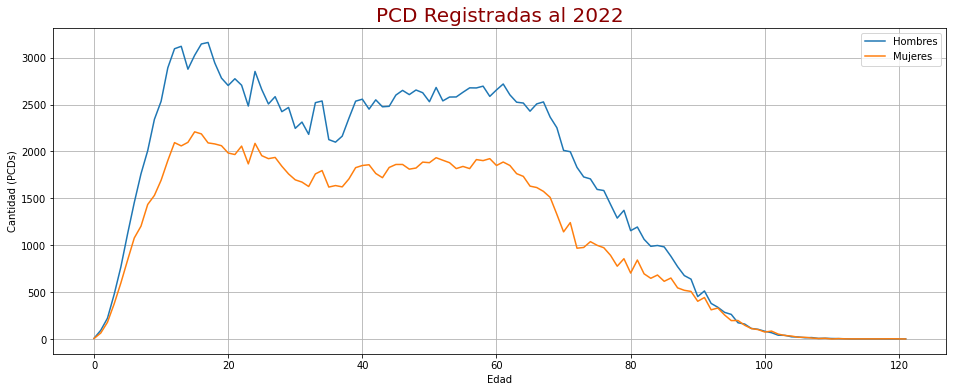

In [11]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# Re-sizing plot area
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)

# Adding a title and axis text
plt.title("PCD Registradas al 2022", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Edad")
plt.ylabel("Cantidad (PCDs)")

plt.plot(dataEdad.index.tolist(), dataEdad.M.tolist(), label='Hombres')
plt.plot(dataEdad.index.tolist(), dataEdad.F.tolist(), label='Mujeres')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

### 2.2. Análisis Gráfico General de PCDs por Tipo de Discapacidad y por Sexo

In [12]:
# Considerando que en el array llegan valores bien definidos -> 0:NO presenta discapacidad - 1:SI presenta discapacidad
def get_condicion(items):
  acumulador = 0
  for item in items:
    acumulador = acumulador + item
  
  resultado = 0 if acumulador == 0 else 1
  return resultado

print(get_condicion([1,0,0]))

1


In [13]:
dataPCDGeneral[columns_data].fillna(0, inplace=True)

dataPCDGeneral['dis_fisica'] = dataPCDGeneral.apply(lambda x: get_condicion([x.def_lenguaje, x.def_audicion, x.def_vision, x.def_viscerales, x.def_musculo, x.def_generalizadas]), axis=1)
dataPCDGeneral['dis_intelectual'] = dataPCDGeneral.apply(lambda x: get_condicion([x.def_intelectual, x.def_psicologica]), axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-13-088c7aa08f41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPCDGeneral['dis_fisica'] = dataPCDGeneral.apply(lambda x: get_condicion([x.def_lenguaje, x.def_audicion, x.def_vision, x.def_viscerales, x.def_musculo, x.def_generalizadas]), axis=1)
<ipython-input-13-088c7aa08f41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [14]:
columns_data.append('dis_fisica')
columns_data.append('dis_intelectual')
#dataPCDGeneral[columns_data].head()

In [15]:
# Tipifica la discapacidad -> F:Fisica - I:Intelectual - FI: Fisica e Intelectual - N:Ninguna discapacidad
def get_tipo(fisica, intelectual):
  resultado = 'N' 
  
  if ((fisica==1) & (intelectual==1)):
    resultado = 'FI'
  elif (fisica==1):
    resultado = 'F'
  elif (intelectual==1):
    resultado = 'I'

  return resultado

print(get_tipo(1, 1))

FI


In [16]:
dataPCDGeneral['dis_tipo'] = dataPCDGeneral.apply(lambda x: get_tipo(x.dis_fisica, x.dis_intelectual), axis=1)

<ipython-input-16-2dc18eeaa48d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPCDGeneral['dis_tipo'] = dataPCDGeneral.apply(lambda x: get_tipo(x.dis_fisica, x.dis_intelectual), axis=1)


In [17]:
columns_data.append('dis_tipo')
dataPCDGeneral[columns_data].head()

,DomDepa,DomProv,DomDist,AñoInsc,Edad,Genero,EducaNivel,EstadoReg,def_intelectual,def_psicologica,def_lenguaje,def_audicion,def_vision,def_viscerales,def_musculo,def_generalizadas,dis_fisica,dis_intelectual,dis_tipo
0,CALLAO,CALLAO,CALLAO,2000,57,M,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,F
4,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2001,80,F,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,F
5,LIMA,LIMA,BREÑA,2001,58,M,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,F
6,PASCO,OXAPAMPA,VILLA RICA,2001,50,M,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,F
7,LIMA,LIMA,RÍMAC,2001,62,F,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,FI


In [18]:
dataDisFisica = dataPCDGeneral.query("(dis_tipo == 'F')")
dataDisIntelectual = dataPCDGeneral.query("(dis_tipo == 'I')")
dataDisFisicaIntelectual = dataPCDGeneral.query("(dis_tipo == 'FI')")

dataDisFisica = pd.crosstab(dataDisFisica.Edad, dataDisFisica.Genero)
dataDisIntelectual = pd.crosstab(dataDisIntelectual.Edad, dataDisIntelectual.Genero)
dataDisFisicaIntelectual = pd.crosstab(dataDisFisicaIntelectual.Edad, dataDisFisicaIntelectual.Genero)

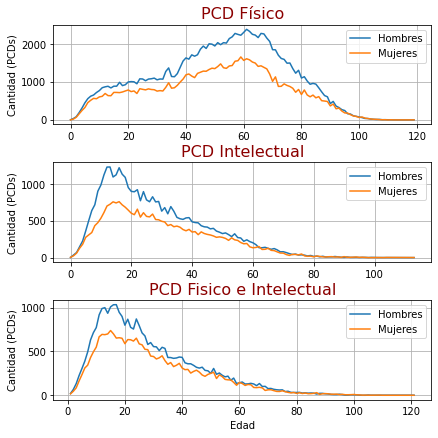

In [19]:
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Re-sizing plot area
f = plt.figure()
#f.set_figwidth(16)
f.set_figheight(6)

plt.subplot(3,1,1)
plt.plot(dataDisFisica.index.tolist(), dataDisFisica.M.tolist(), label='Hombres')
plt.plot(dataDisFisica.index.tolist(), dataDisFisica.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Físico', fontdict=font)
plt.ylabel("Cantidad (PCDs)")

plt.subplot(3,1,2)
plt.plot(dataDisIntelectual.index.tolist(), dataDisIntelectual.M.tolist(), label='Hombres')
plt.plot(dataDisIntelectual.index.tolist(), dataDisIntelectual.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Intelectual', fontdict=font)
plt.ylabel("Cantidad (PCDs)")

plt.subplot(3, 1, 3)
plt.plot(dataDisFisicaIntelectual.index.tolist(), dataDisFisicaIntelectual.M.tolist(), label='Hombres')
plt.plot(dataDisFisicaIntelectual.index.tolist(), dataDisFisicaIntelectual.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Fisico e Intelectual', fontdict=font)
plt.ylabel("Cantidad (PCDs)")
plt.xlabel("Edad")

plt.tight_layout(pad=0.4, w_pad=1, h_pad=0.3) # UPDATE 3: set space manually

plt.show()

## 3. Análisis por **Edad** y **Tipo de Discapacidad**

In [20]:
dataDiscapacidad = pd.crosstab(dataPCDGeneral.Edad, dataPCDGeneral.dis_tipo)
dataDiscapacidad.head()

dis_tipo,F,FI,I
Edad,,,
0,6,0,6
1,59,36,60
2,156,113,130
3,355,218,276
4,567,389,409


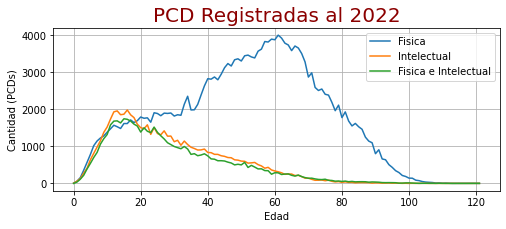

In [25]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# Re-sizing plot area
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(3)

# Adding a title and axis text
plt.title("PCD Registradas al 2022", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Edad")
plt.ylabel("Cantidad (PCDs)")

plt.plot(dataDiscapacidad.index.tolist(), dataDiscapacidad.F.tolist(), label='Fisica')
plt.plot(dataDiscapacidad.index.tolist(), dataDiscapacidad.I.tolist(), label='Intelectual')
plt.plot(dataDiscapacidad.index.tolist(), dataDiscapacidad.FI.tolist(), label='Fisica e Intelectual')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

In [27]:
dataDisAño = pd.crosstab(dataPCDGeneral.AñoInsc, dataPCDGeneral.dis_tipo)
dataDisAño.head()

dis_tipo,F,FI,I
AñoInsc,,,
2000,1,0,0
2001,887,78,189
2002,2713,322,459
2003,5928,604,868
2004,5717,788,1192


In [39]:
años = dataDisAño.index.tolist()

dataDisAño.to_dict('dict').keys()
dataDisAño_dic = dataDisAño.to_dict('list')

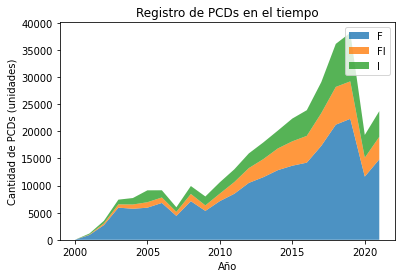

In [46]:
fig, ax = plt.subplots()
ax.stackplot(años, dataDisAño_dic.values(), labels = dataDisAño.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('Registro de PCDs en el tiempo')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de PCDs (unidades)')

plt.show()

In [53]:
dataPCDGeneral[columns_data].head()

,DomDepa,DomProv,DomDist,AñoInsc,Edad,Genero,EducaNivel,EstadoReg,LimGravedad,def_intelectual,def_psicologica,def_lenguaje,def_audicion,def_vision,def_viscerales,def_musculo,def_generalizadas
0,CALLAO,CALLAO,CALLAO,2000,57,M,6,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2001,80,F,2,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,LIMA,LIMA,BREÑA,2001,58,M,3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,PASCO,OXAPAMPA,VILLA RICA,2001,50,M,3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,LIMA,LIMA,RÍMAC,2001,62,F,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
dataGravedad = pd.crosstab(dataPCDGeneral.Edad, dataPCDGeneral.LimGravedad)
dataGravedad.head()

LimGravedad,1,2,3,9
Edad,,,,
0,2,3,7,0
1,10,24,121,0
2,21,68,310,0
3,43,153,653,0
4,56,228,1081,0


In [57]:
edad = dataGravedad.index.tolist()

dataGravedad.to_dict('dict').keys()
dataGravedad_dic = dataGravedad.to_dict('list')

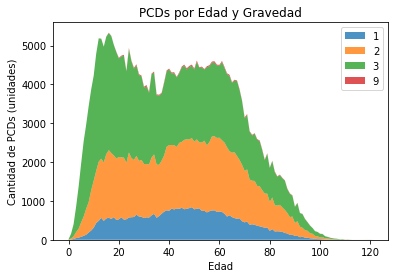

In [59]:
fig, ax = plt.subplots()
ax.stackplot(edad, dataGravedad_dic.values(), labels = dataGravedad.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('PCDs por Edad y Gravedad')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de PCDs (unidades)')

# 1=Leve, 2=Moderado, 3=Severo, 9=No especificado
plt.show()